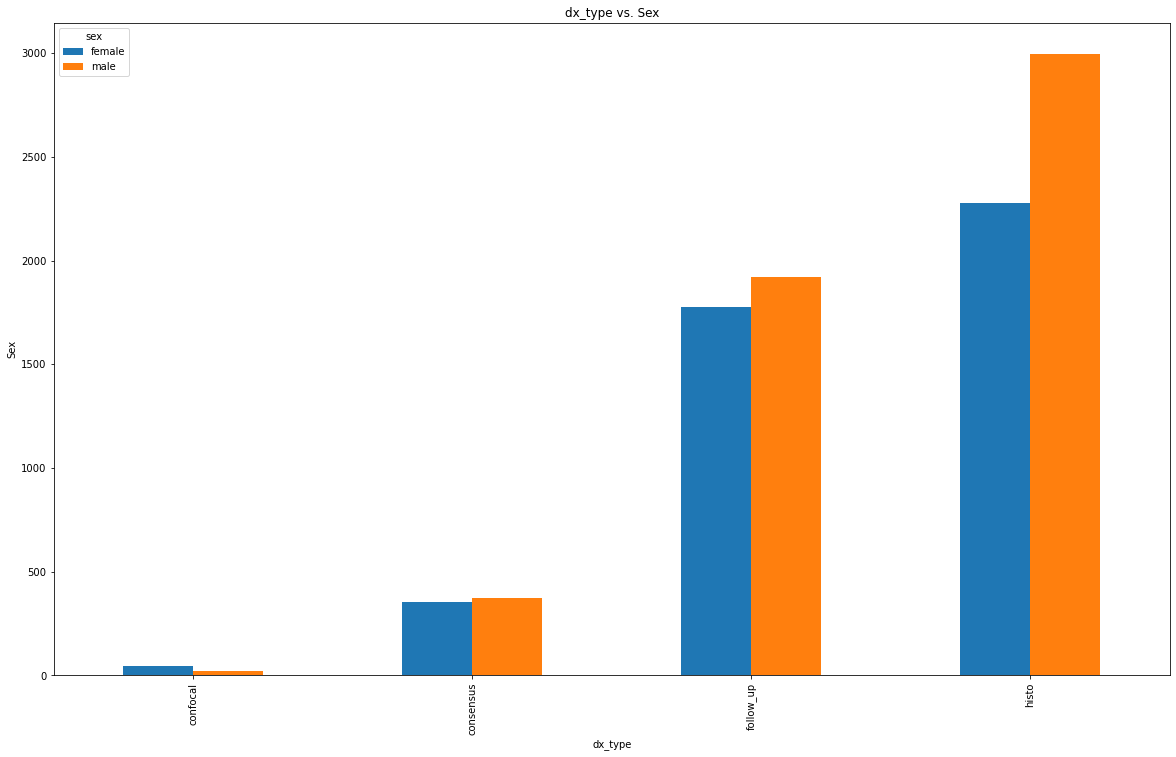

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# original df
df = pd.read_csv('..//Data//HAM10000_metadata.csv')
df.count()

# clean data
clean_df = df.dropna(axis= 'rows')
clean_df = clean_df.loc[clean_df['sex'] != 'unknown']
clean_df = clean_df.loc[clean_df['localization'] != 'unknown']
clean_df.count()

#add 'Age Groups' column
bins = [0, 39.9 ,49.9, 59.9, 69.9, 79.9, 100]
group_names = ['Under Forty', 'Forties', 'Fifties', 'Sixties', 'Seventies', 'Over Eighty']

clean_df2 = clean_df
clean_df2['Age Groups'] = pd.cut(clean_df2['age'], bins, labels=group_names, include_lowest=True)

clean_df2.groupby('sex')['dx_type'].value_counts().unstack(0).plot.bar(figsize=(20,12))
plt.title('dx_type vs. Sex')
plt.xlabel('dx_type')
plt.ylabel('Sex')
plt.rcParams.update({'font.size': 20})

plt.show()